# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Tsaqif Mu'tashim Mufid
- **Email:** mufidmutashim@gmail.com
- **ID Dicoding:** mc0dex

## Menentukan Pertanyaan Bisnis

- Kategori roduk apa yang memiliki penjualan tertinggi dan terendah?
- Bagaimana tren jumlah pesanan dari waktu ke waktu berdasarkan tahunan?
- Metode pembayaran apa yang paling populer di kalangan pelanggan?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering pelanggan melakukan banyak transaksi?
- Berapa banyak yang biasanya dihabiskan oleh seorang pelanggan dalam satu transaksi?

## Import Semua Packages/Library yang Digunakan

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import datetime as dt

## Data Wrangling

### Gathering Data

In [24]:
# Data customer
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight Data Costumers:**
- Dari data yang didapatkan terdapat 5 kolom yaitu `customer_id`, `customer_unique_id`, `customer_zip_code_prefix`, `customer_city`, `customer_state`.
- Data consumer ini menjadi dasar acuan untuk nantinya yang akan dijadikan dalam penyatuan dalam menjawab pertanyaan bisnis yang sudah di definisikan sebelumnya.

In [25]:
# Data orders
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight Data Orders:**
- Karena ada table `customer_id` yang saling berkaitan antara data Customers terhadap Orders khususnya `order_id`.
- Data ini juga merupakan data pendukung untuk menjawab kebutuhan pertanyaan bisnis.

In [26]:
# Data orders_item
order_item_df = pd.read_csv("data/order_items_dataset.csv")
order_item_df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Insight Data Orders Item:**
- Sama halnya seperti sebelumnya, karena tujuan kita untuk mengetahui produk mana yang memiliki penjualan tertinggi dan terendah perlu adanya data dari Orders Item khususnya tabel yang saling berkaitan antara `order_id` terhadap `product_id`.
- Data ini juga merupakan data pendukung untuk mengetahui capaian dari pertanyaan bisnis.

In [27]:
# Data products
products_df = pd.read_csv("data/products_dataset.csv")
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insight Data Products:**
- `product_id` menjadi kunci untuk menjawab pertanyaan bisnis, karena nantinya data yang dimiliki akan digabungkan sehingga akan menjawab pertanyaan bisnis.
- Data ini merupakan pendukung paling vital.

In [28]:
# Data terjemahan kategori
products_category_translate_df = pd.read_csv("data/product_category_name_translation.csv")
products_category_translate_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Insight Data Terjemahan Kategorit:**
- Karena produk tidak menggunakan bahasa universal, maka data ini akan menjadi acuan untuk mengetahui produk mana yang berkaitan dengan pertanyaan bisnis khususnya pada tabel `product_category_name`.
- Data ini merupakan pendukung bisnis.

In [29]:
# Data orders_payment
orders_payment_df = pd.read_csv("data/order_payments_dataset.csv")
orders_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Insight Data Orders Payment:**
- Data ini merupakan acuan untuk mengetahui pembayaran mana yang paling sering digunakan terhadap tabel `order_id`.
- Data ini merupakan titik vital untuk menjawab pertanyaan bisnis

### Assessing Data

#### Customers

In [44]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
# Cek data kosong pada data customer
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Customers, sehingga tidak perlu dilakukan data cleaning terkait missing values.

#### Orders

In [30]:
# Cek data kosong pada data orders
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Ditemukan nilai null dalam data Orders khususnya pada tabel `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`. Sehingga perlu dilakukan data cleaning terkait missing values.

In [35]:
# Cek data kosong pada order_item_df
order_item_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Orders_Item, sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [32]:
# Cek data kosong pada data orders_payment
orders_payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Orders_Payment, sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [36]:
# Merging data
all_orders_df = orders_df.merge(order_item_df, on='order_id', how='left').merge(orders_payment_df, on='order_id', how='left')
all_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1.0,credit_card,3.0,195.00
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1.0,credit_card,5.0,271.01
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16


In [45]:
all_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

In [46]:
# Cek data kosong pada data gabungan
all_orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
dtype: int64

**Insight:**
- Setelah digabungkan menjadi satu data, ditemukan nilai null dalam data Orders, sehingga perlu dilakukan data cleaning terkait missing values.

#### Products

In [37]:
# Cek data kosong pada data products
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Ditemukan nilai null dalam data keseluruhan Products kecuali `product_id`. Sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [38]:
# Cek data kosong pada products_category_translate_df
products_category_translate_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Product_Category, sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [39]:
# Merging products_df dan products_category_translate_df
all_products_df = products_df.merge(products_category_translate_df, on='product_category_name', how='left')
all_products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [40]:
# Ganti nama kolom product_category_name_english menjadi product_category
all_products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
all_products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [41]:
# Hapus kolom product_category_name jika tidak diperlukan
all_products_df.drop(columns=['product_category_name'], inplace=True)
all_products_df

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [48]:
# Cek data kosong pada all_products_df
all_products_df.isnull().sum()

product_id                      0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category              623
dtype: int64

**Insight:**
- Ditemukan niai null pada beberapa tabel yang digabungkan, sehingga perlu dilakukan data cleaning terkait missing values.

### Cleaning Data

#### Orders

In [49]:
# Drop missing values
all_orders_df.dropna(axis=0, inplace=True)

In [50]:
# Cek data yang kosong
all_orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

**Insight:**
- Metode cleaning data yang dipakai yaitu Dropping `.dropna()` karena semua fitur yang tidak berkaitan akan beresiko jika menggunakan metode Imputation `.fillna()` dan juga Interpolation `.interpolate()`.

#### Products

In [51]:
# Hapus data yang missing value
all_products_df.dropna(axis=0, inplace=True)

In [52]:
# Cek missing value
all_products_df.isnull().sum()

product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category              0
dtype: int64

**Insight:**
- Metode cleaning data yang dipakai yaitu Dropping `.dropna()` karena semua fitur yang tidak berkaitan akan beresiko jika menggunakan metode Imputation `.fillna()` dan juga Interpolation `.interpolate()`.

#### Main Data

In [54]:
# Merge all data into one dataframe
all_data = all_orders_df.merge(customers_df, on='customer_id', how='left').merge(all_products_df, on='product_id', how='left')

In [55]:
# Cek missing value
all_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_name_lenght              1651
product_description_lenght       1651
product_photos_qty               1651
product_weight_g                 1651
product_leng

In [56]:
# Drop missing values
all_data.dropna(axis=0, inplace=True)

In [57]:
all_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm    

In [59]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113367 entries, 0 to 115017
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   order_item_id                  113367 non-null  float64
 9   product_id                     113367 non-null  object 
 10  seller_id                      113367 non-null  object 
 11  shipping_limit_date            113367 non-null  object 
 12  price                          1133

In [58]:
# Export data
all_data.to_csv('dashboard/main_data.csv', index=False)

**Insight:**
- Karena data yang digunakan adalah data gabungan dari beberapa tabel, dan ternyata masih ada missing values maka perlu dilakukan cleaning data dengan metode `.dropna()`.
- Setelah dilakukan cleaning data, data yang digunakan sudah bersih dari missing values.
- Data yang sudah bersih akan digunakan untuk analisis data.

## Exploratory Data Analysis (EDA)

### Korelasi Data

In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113367 entries, 0 to 115017
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   order_item_id                  113367 non-null  float64
 9   product_id                     113367 non-null  object 
 10  seller_id                      113367 non-null  object 
 11  shipping_limit_date            113367 non-null  object 
 12  price                          1133

In [60]:
# Cek distribusi data
all_data.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000
mean,1.196856,120.161067,20.024231,1.089947,2.942532,172.222013,35081.859236,48.800427,785.794746,2.209241,2110.532633,30.282834,16.617411,23.099694
std,0.701325,182.714900,15.753323,0.682120,2.777846,266.576121,29845.463618,10.018615,651.018280,1.720307,3770.553691,16.161733,13.448605,11.741288
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.000000,11320.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.140000,24325.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,133.700000,21.200000,1.000000,4.000000,189.370000,58775.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


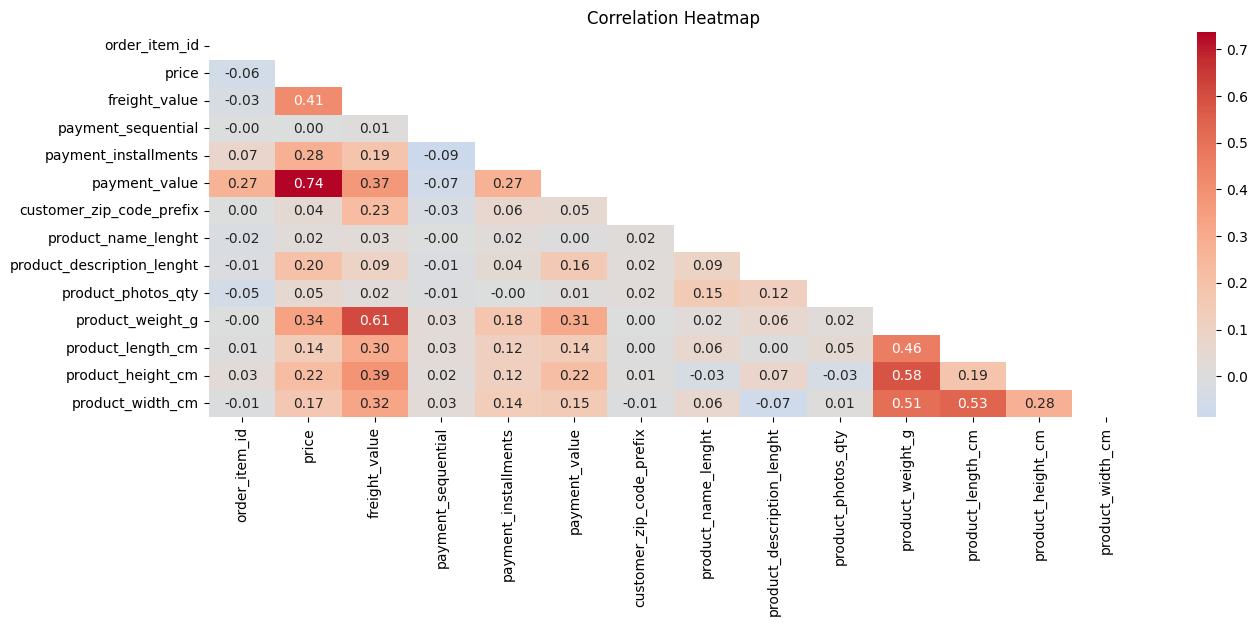

In [72]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = all_data.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Dari fungsi `.describe()` terlihat bahwa rata-rata jumlah produk yang dibeli oleh pelanggan adalah cenderung 1 produk.
- Dari correlation matrix terlihat bahwa `price` terhadap `payment_value` memiliki korelasi yang cukup tinggi. Sedangkan `freight_value` terhadap `product_weight_g` memiliki korelasi yang cukup tinggi juga.

### Tren Data

In [87]:
# Konversi order_purchase_timestamp ke format datetime
all_orders_df['order_purchase_timestamp'] = pd.to_datetime(all_orders_df['order_purchase_timestamp'])

# Buat agregasi jumlah order per bulan
monthly_orders = all_orders_df.resample('MS', on='order_purchase_timestamp').size()
monthly_orders

order_purchase_timestamp
2016-10-01     336
2016-11-01       0
2016-12-01       1
2017-01-01     961
2017-02-01    1949
2017-03-01    3078
2017-04-01    2707
2017-05-01    4260
2017-06-01    3687
2017-07-01    4726
2017-08-01    5053
2017-09-01    5002
2017-10-01    5455
2017-11-01    8812
2017-12-01    6440
2018-01-01    8364
2018-02-01    7766
2018-03-01    8337
2018-04-01    8112
2018-05-01    8104
2018-06-01    7318
2018-07-01    7196
2018-08-01    7354
Freq: MS, dtype: int64

**Insight:**
- Tren data menunjukkan bahwa jumlah pesanan cenderung meningkat dari 2016 hingga 2018, kenaikan yang signifikan terjadi pada tahun 2017. Namun, pada tahun 2018 terjadi penurunan jumlah pesanan.

In [90]:
# Kelompokkan per bulan dan hitung jumlah masing-masing metode pembayaran
payment_trend = all_orders_df.groupby([all_orders_df['order_purchase_timestamp'].dt.to_period('M'), 'payment_type']).size().unstack()

In [111]:
payment_trend.describe()

payment_type,boleto,credit_card,debit_card,voucher
count,21.000000,22.000000,21.000000,21.000000
mean,1064.142857,3858.863636,78.714286,291.571429
std,481.178375,2116.086781,80.250323,116.227179
min,61.000000,1.000000,2.000000,20.000000
25%,796.000000,2285.250000,28.000000,244.000000
50%,1138.000000,3806.500000,53.000000,328.000000
75%,1478.000000,5755.250000,81.000000,380.000000
max,1714.000000,6621.000000,298.000000,460.000000


**Insight:**
- Data tersebut menunjukkan bahwa metode pembayaran yang paling populer adalah menggunakan kartu kredit. Disusul oleh pembayaran dengan boleto dan voucher. Sedangkan metode pembayaran yang paling jarang digunakan adalah debit card.

### EDA Bivariate

In [ ]:
# Hitung total penjualan per kategori produk
category_sales = all_data.groupby('product_category')['price'].sum().sort_values(ascending=False)
category_sales.columns = ['Kategori Produk', 'Total Penjualan']

In [ ]:
# Urutkan berdasarkan total penjualan
top_categories = category_sales.sort_values(ascending=False).head(10)
bottom_categories = category_sales.sort_values(ascending=True).head(10)

In [101]:
top_categories

product_category
health_beauty            1271413.18
watches_gifts            1213162.80
bed_bath_table           1077834.14
sports_leisure            990417.74
computers_accessories     918837.87
furniture_decor           745748.80
housewares                648187.74
cool_stuff                634163.78
auto                      602881.75
garden_tools              492255.08
Name: price, dtype: float64

In [102]:
bottom_categories

product_category
security_and_services         283.29
fashion_childrens_clothes     519.95
cds_dvds_musicals             730.00
home_comfort_2                773.17
flowers                      1110.04
diapers_and_hygiene          1500.79
arts_and_craftmanship        1814.01
fashion_sport                2094.52
la_cuisine                   2303.98
fashio_female_clothing       2634.94
Name: price, dtype: float64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki penjualan tertinggi dan terendah?

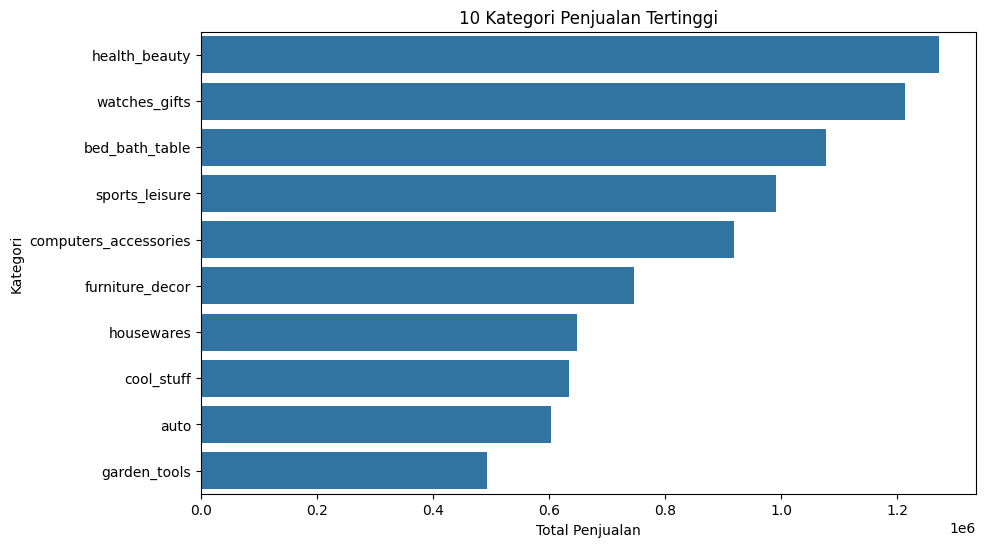

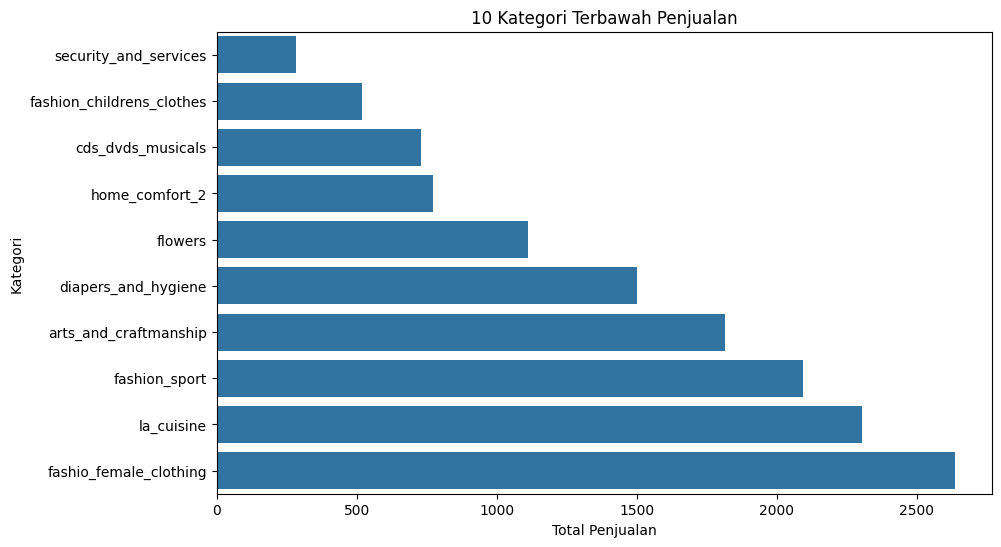

In [104]:
# Convert Series to DataFrame
top_categories_df = top_categories.reset_index()
top_categories_df.columns = ['Kategori Produk', 'Total Penjualan']

bottom_categories_df = bottom_categories.reset_index()
bottom_categories_df.columns = ['Kategori Produk', 'Total Penjualan']

# Visualisasi penjualan tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories_df, x='Total Penjualan', y='Kategori Produk')
plt.title('10 Kategori Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori')
plt.show()

# Visualisasi penjualan terendah
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_categories_df, x='Total Penjualan', y='Kategori Produk')
plt.title('10 Kategori Terbawah Penjualan')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori')
plt.show()

### Pertanyaan 2: Bagaimana tren jumlah pesanan dari waktu ke waktu berdasarkan tahunan?

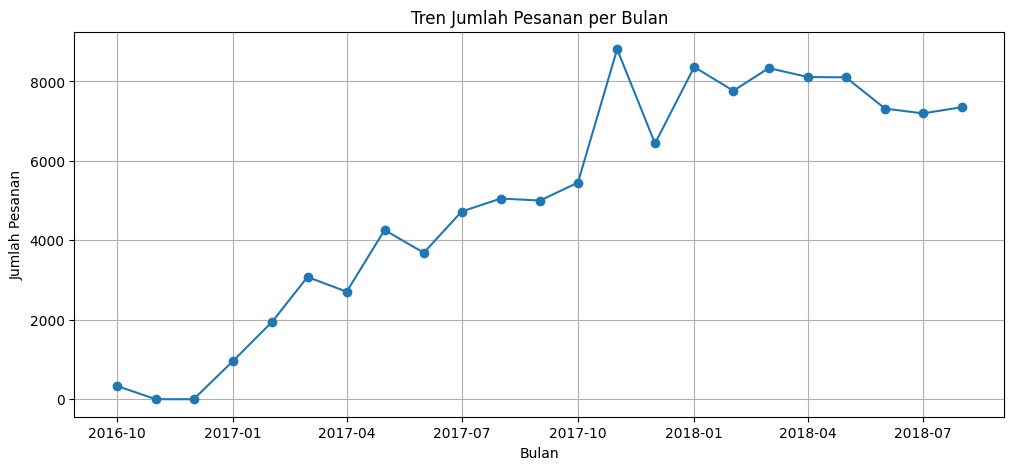

In [108]:
# Plot tren pesanan
plt.figure(figsize=(12, 5))
plt.plot(monthly_orders, marker='o', linestyle='-')
plt.title("Tren Jumlah Pesanan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid()
plt.show()

### Pertanyaan 3: Metode pembayaran apa yang paling populer di kalangan pelanggan?

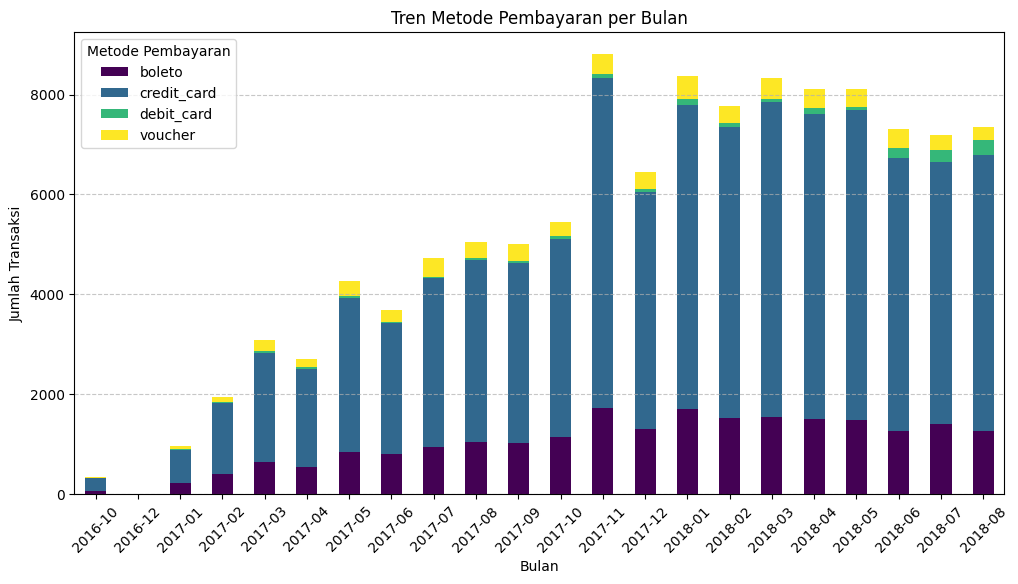

In [109]:
# Plot
payment_trend.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Tren Metode Pembayaran per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.legend(title="Metode Pembayaran")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
### Q1: Kategori Produk Terlaris & Terendah
>  Dalam hasil dari Exploratory didapatkan bahwa order_item_df dan products_df memiliki satu keterkaitan yaitu `product_id`. Sehingga hasil yang diinginkan bisa terjawab dengan baik melalui pivot tabel antara `price` dikalikan dengan jumlah `order_item_id` menghasilkan beberapa kategori paling banyak terjual yaitu `health_beauty`, `watches_gifts` dan `bed_bath_table`. Sedangkan paling sedikit kategori yang terjual yaitu `security_and_services`.
### Q2: Tren Jumlah Transaksi (2016-2018)
> Terjadi peningkatan bertahap jumlah transaksi dari 2016 hingga 2018, namun terjadi penurunan pada tahun 2018. Tertinggi pada tahun 2017 dan terendah pada tahun 2016.
### Q3: Metode Pembayaran Dominan
> Metode pembayaran yang paling banyak digunakan adalah kartu kredit, disusul oleh boleto dan voucher. Sedangkan metode pembayaran yang paling jarang digunakan adalah debit card.


## Analisis Lanjutan (Opsional)

In [51]:
# Konversi tanggal transaksi ke datetime
all_orders_df['order_purchase_timestamp'] = pd.to_datetime(all_orders_df['order_purchase_timestamp'])

# Tentukan tanggal referensi (misalnya, hari terakhir transaksi)
latest_date = all_orders_df['order_purchase_timestamp'].max()
print(f"Tanggal referensi: {latest_date}")

Tanggal referensi: 2018-08-29 15:00:37


In [52]:
# Grouping berdasarkan customer_id
rfm_df = all_orders_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
})

# Ganti nama kolom agar lebih jelas
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)

# Lihat hasil
print(rfm_df.head())


                                  Recency  Frequency  Monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703      287          1    114.74
000161a058600d5901f007fab4c27140      409          1     67.41
0001fd6190edaaf884bcaf3d49edf079      547          1    195.42
0002414f95344307404f0ace7a26f1d5      378          1    179.35
000379cdec625522490c315e70c7a9fb      149          1    107.01


In [80]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,96460.000000,96460.000000,96460.000000
mean,239.099844,1.192391,204.990615
std,152.820769,0.732103,621.292808
min,0.000000,1.000000,9.590000
25%,115.000000,1.000000,62.657500
50%,220.000000,1.000000,109.500000
75%,349.000000,1.000000,195.540000
max,695.000000,63.000000,109312.640000


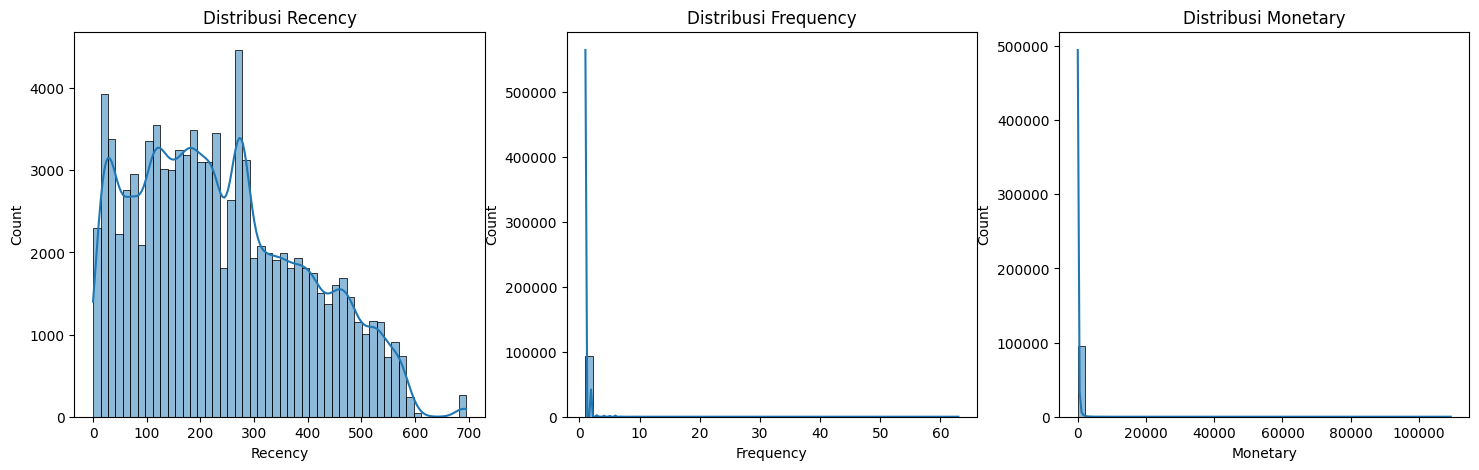

In [ ]:
# Visualisasi distribusi Recency, Frequency, dan Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_df['Recency'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Recency')

sns.histplot(rfm_df['Frequency'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribusi Frequency')

sns.histplot(rfm_df['Monetary'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribusi Monetary')

plt.show()


In [ ]:
# Mengatasi jumlah nilai unik yang sedikit → rank(method="first") memastikan data tetap terurut unik.
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'].rank(method="first"), bins=3, labels=[3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'].rank(method="first"), bins=3, labels=[1, 2, 3])
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'].rank(method="first"), bins=3, labels=[1, 2, 3])

# Gabungkan skor menjadi RFM Score
rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(str) + 
    rfm_df['F_Score'].astype(str) + 
    rfm_df['M_Score'].astype(str)
)

rfm_df.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,2,212,Hibernating
000161a058600d5901f007fab4c27140,409,1,67.41,1,1,1,111,Hibernating
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,3,113,Hibernating
0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,3,113,Hibernating
000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,2,312,Promising


In [ ]:
def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r == 3 and f == 3 and m == 3:
        return 'Loyal Customers'
    elif r == 3 and (f < 3 or m < 3):
        return 'Promising'
    elif r < 3 and f >= 2 and m >= 2:
        return 'Customers Needing Attention'
    else:
        return 'Hibernating'

# Buat kolom baru untuk segmentasi
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Lihat hasil
print(rfm_df['Segment'].value_counts())


Segment
Hibernating                    34953
Customers Needing Attention    29353
Promising                      27258
Loyal Customers                 4896
Name: count, dtype: int64


C:\Users\mufid\AppData\Local\Temp\ipykernel_30204\1296900333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='coolwarm')


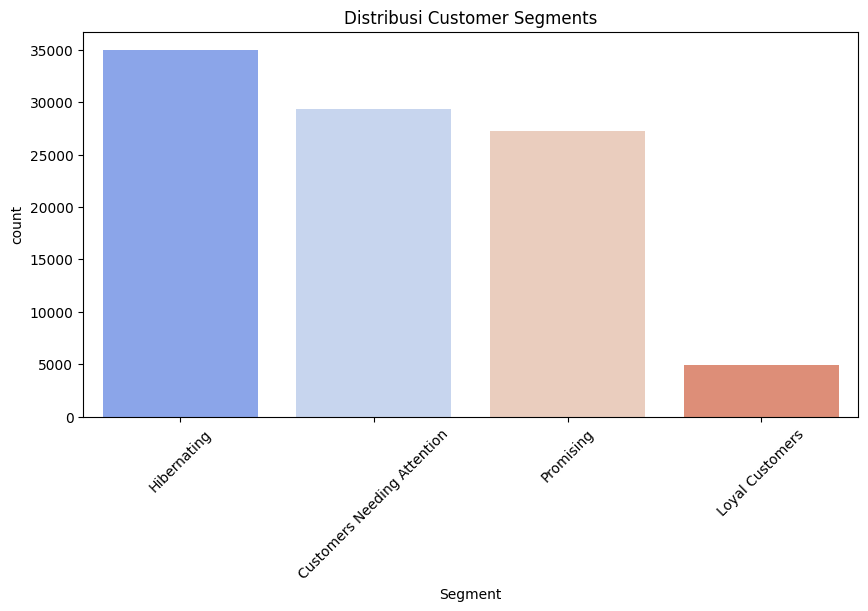

In [ ]:
# Visualisasi distribusi customer segments
plt.figure(figsize=(10,5))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribusi Customer Segments')
plt.show()


**Insight:**

> Berdasarkan analisis Recency, Frequency, dan Monetary (RFM), transaksi terakhir tercatat pada 29 Agustus 2018 pukul 15:00:37. Rata-rata pelanggan hanya melakukan 1 kali transaksi, tetapi terdapat pelanggan yang bertransaksi hingga 63 kali. Dari sisi pengeluaran, mayoritas pelanggan memiliki pola belanja yang moderat, namun ada pelanggan dengan total pengeluaran tertinggi mencapai $109.312,64.

> Hasil segmentasi RFM Analysis menunjukkan bahwa pelanggan terbagi ke dalam empat segmen utama:

- Hibernating → 34.953 pelanggan
- Customers Needing Attention → 29.353 pelanggan
- Promising → 27.258 pelanggan
- Loyal Customers → 4.896 pelanggan

Penjelasan Segmen Pelanggan:

🔵 Hibernating → Pelanggan dalam segmen ini memiliki recency rendah (transaksi terakhir sudah lama), frequency rendah (jarang bertransaksi), dan monetary rendah (pengeluaran kecil). Mereka berisiko churn, sehingga diperlukan strategi re-engagement seperti diskon khusus atau kampanye email marketing.

🟠 Customers Needing Attention → Segmen ini mencakup pelanggan yang sebelumnya cukup aktif, tetapi dalam beberapa waktu terakhir tidak melakukan transaksi. Frekuensi dan total belanja mereka bervariasi, tetapi tingkat recency semakin menurun. Strategi retensi dapat dilakukan melalui pengingat transaksi, penawaran eksklusif, atau program loyalitas.

🟡 Promising → Pelanggan dalam segmen ini masih memiliki keterlibatan yang cukup baik. Mereka mulai bertransaksi baru-baru ini, tetapi belum terlalu sering. Peluang konversi menjadi pelanggan loyal masih terbuka, sehingga dapat diberikan insentif pembelian kedua, program referral, atau promosi eksklusif.

🟢 Loyal Customers → Segmen ini terdiri dari pelanggan terbaik dengan frequency dan monetary tinggi serta recency yang baik. Mereka sering bertransaksi dan berkontribusi besar terhadap pendapatan. Strategi utama adalah mempertahankan loyalitas mereka dengan penawaran VIP, early access ke produk baru, atau reward eksklusif.

- Referensi: 
>https://youtu.be/5BgAfG4e1wY?si=oCjrzh-Xt_EVjt_E 

>https://www.kaggle.com/code/canaazizatulakbar/customer-segementation-recommendation-system#2.9.-Category-Translation-Dataset

## Conclusion

- Dominasi pembelian terjadi pada kategori kesehatan & kecantikan `(health_beauty)`, hadiah & jam tangan `(watches_gifts)`, serta perlengkapan rumah `(bed_bath_table)`. Sementara kategori keamanan & layanan `(security_and_services)` memiliki penjualan terendah.
- Tren jumlah pesanan menunjukkan peningkatan dari tahun 2016 hingga 2017, namun mengalami penurunan pada tahun 2018.
- Metode pembayaran yang paling populer adalah kartu kredit, diikuti oleh boleto dan voucher. Sedangkan debit card merupakan metode pembayaran yang paling jarang digunakan
- Transaksi terakhir tercatat pada 29 Agustus 2018 pukul 15:00:37.
- Rata-rata pelanggan hanya melakukan 1 kali transaksi, tetapi terdapat pelanggan yang bertransaksi hingga 63 kali. 
- Mayoritas pelanggan memiliki pola belanja yang moderat, namun ada pelanggan dengan total pengeluaran tertinggi mencapai $109.312,64. Berdasarkan segmentasi RFM, pelanggan terbagi ke dalam empat segmen utama: Hibernating, Customers Needing Attention, Promising, dan Loyal Customers. Pelanggan dalam segmen Hibernating memiliki risiko churn dan memerlukan strategi re-engagement. Pelanggan dalam segmen Customers Needing Attention memerlukan strategi retensi. Pelanggan dalam segmen Promising memiliki peluang konversi menjadi pelanggan loyal. Sedangkan pelanggan dalam segmen Loyal Customers merupakan pelanggan terbaik yang memerlukan strategi untuk mempertahankan loyalitas mereka.